##### problem statement:
To develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan.


##### Expected Outcomes 

1. Data cleaning including missing values, outliers and multi-collinearity. 

2. Describe your fraud detection model in elaboration.

3. How did you select variables to be included in the model?

4. Demonstrate the performance of the model by using best set of tools.

5. What are the key factors that predict fraudulent customer? 

6. Do these factors make sense? If yes, How? If not, How not? 

7. What kind of prevention should be adopted while company update its infrastructure?

8. Assuming these actions have been implemented, how would you determine if they work?

##### importing  libraries

In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
warnings.filterwarnings('ignore')

##### loading dataset

In [2]:
df=pd.read_csv('dataset\\Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#####  Data Cleaning

In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


- Some Conclusion:-
1. dataset contains 11 columns. 
2. some columns such as  type , nameOrig ,  nameDest is object type.
3. Some columns such as  nameOrig,nameDest,step , type  there is not no use of such columns in Fraud detection. 

Let's Retain the 6 features and the target variable

In [6]:
df=df.drop(columns=['nameOrig','nameDest','step','type'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


checking missing values

In [8]:
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- It is clear that given dataset does not contain any missing values

Now checking duplicates values 

In [9]:
df.duplicated().sum()

97882

- Dataset contains any duplicate rows

In [10]:
# remove duplicated data 
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.264738e+06,6.264738e+06,6.264738e+06,6.264738e+06,6.264738e+06,6.264738e+06,6.264738e+06
mean,1.824673e+05,8.468284e+05,8.684742e+05,1.117899e+06,1.244053e+06,1.300932e-03,2.553978e-06
std,6.075124e+05,2.908704e+06,2.944834e+06,3.422825e+06,3.699419e+06,3.604497e-02,1.598115e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.416021e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.836349e+04,1.529700e+04,0.000000e+00,1.475252e+05,2.296297e+05,0.000000e+00,0.000000e+00
75%,2.113648e+05,1.112950e+05,1.507195e+05,9.672617e+05,1.138082e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### input and output column

In [13]:
X=df.drop(['isFraud'],axis=1)
y=df['isFraud']

#### training and testing data split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=51)

In [15]:
print("training data shape :",X_train.shape)
print("testing data shape :",X_test.shape)

training data shape : (4385316, 6)
testing data shape : (1879422, 6)


#### Checking if the data normally distributed or not 

<AxesSubplot:ylabel='Density'>

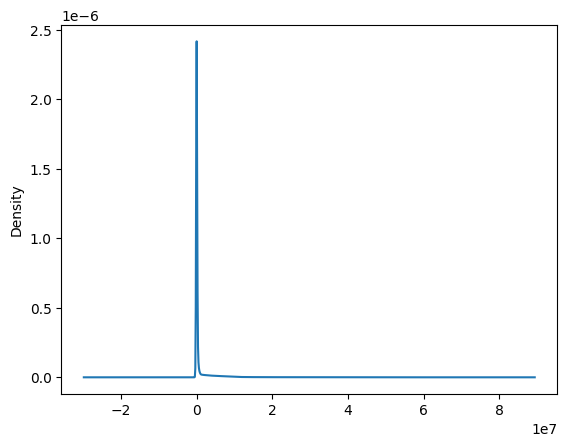

In [15]:
df['oldbalanceOrg'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

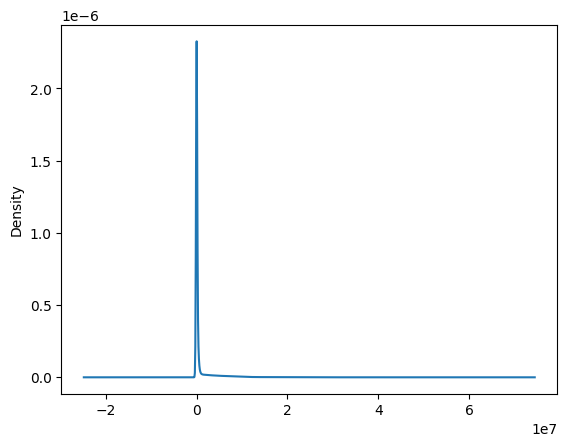

In [16]:
df['newbalanceOrig'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

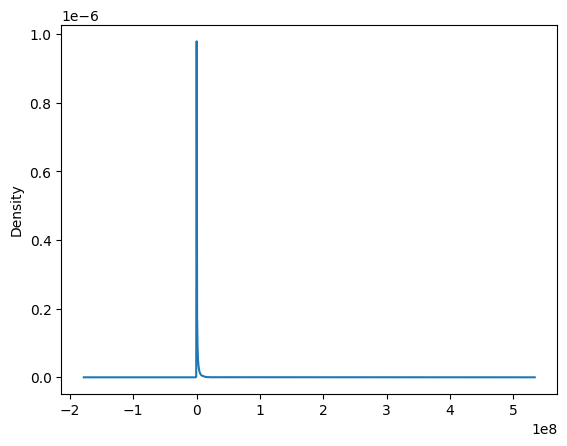

In [17]:
df['oldbalanceDest'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

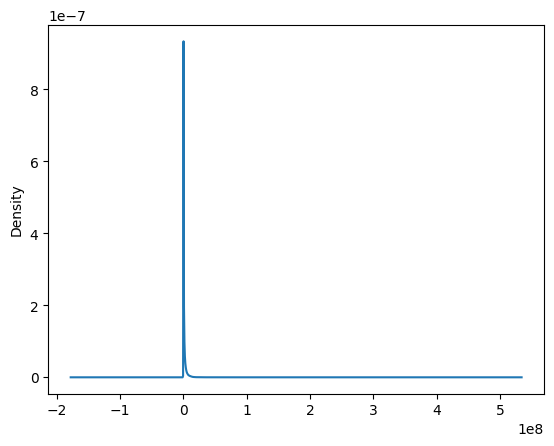

In [18]:
df['newbalanceDest'].plot(kind='kde')

- From the above plots it is clear that values should be standarize 

Let's apply standardization on dataset

In [23]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

(-30.0, 30.0, 0.0, 5000000.0)

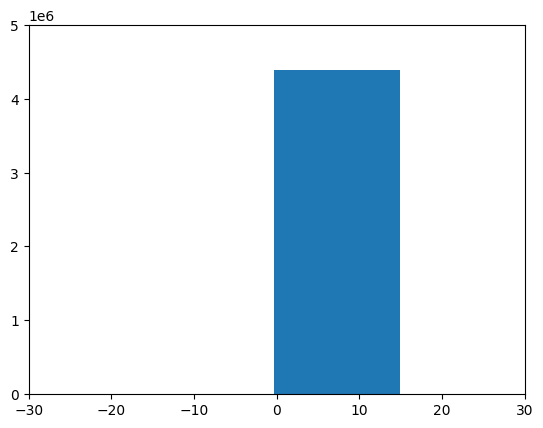

In [43]:
plt.hist(X_train_scaled.amount)
plt.axis([-30,30,0,5000000])

#### Let's Check Outlier for our dataset

In [16]:
# columns 
column_name=df.columns

<AxesSubplot:>

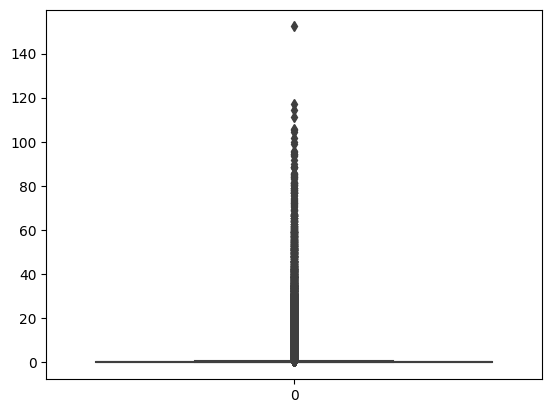

In [44]:
sns.boxplot(X_train_scaled['amount'])

<AxesSubplot:>

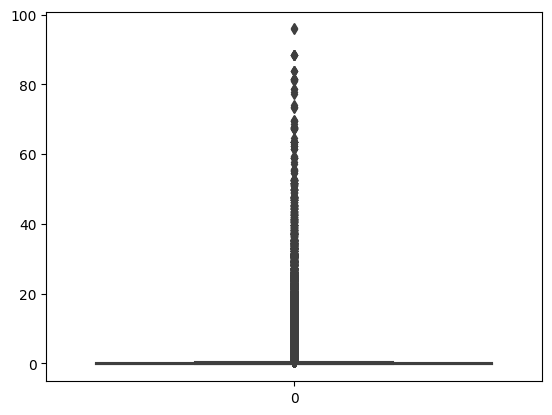

In [45]:
sns.boxplot(X_train_scaled['newbalanceDest'])

<AxesSubplot:>

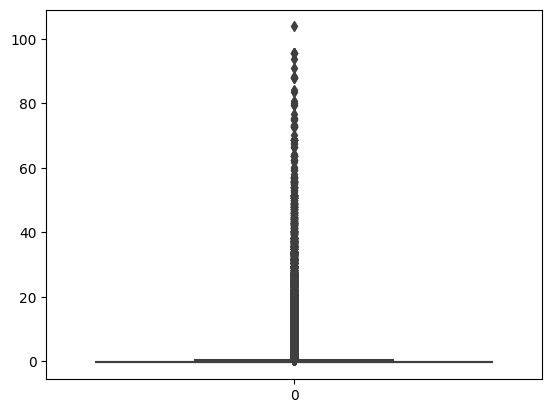

In [46]:
sns.boxplot(X_train_scaled['oldbalanceDest'])

<AxesSubplot:>

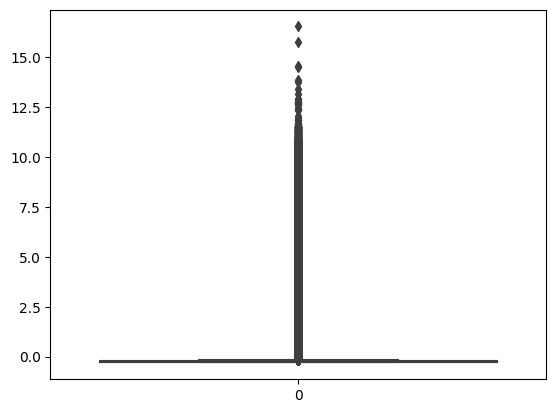

In [47]:
sns.boxplot(X_train_scaled['newbalanceOrig'])

<AxesSubplot:>

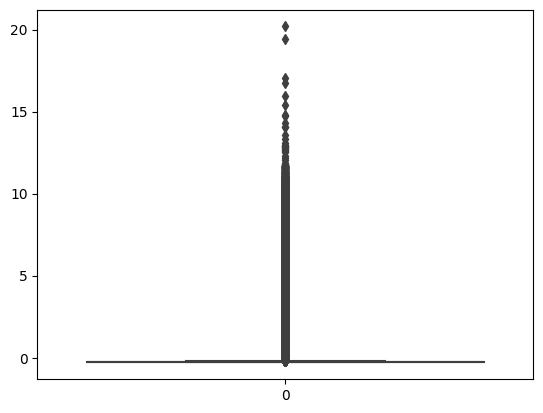

In [48]:
sns.boxplot(X_train_scaled['oldbalanceOrg'])

#### let's check dataset is imbalance or not 

In [49]:
df['isFraud'].value_counts()

isFraud
0    6256588
1       8150
Name: count, dtype: int64

- It is clear that dataset is imbalance.

#### Loading Models

In [50]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

#### without handling imbalance data

In [177]:
lr=LogisticRegression()
xgb=XGBClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

1. logistic regression

In [178]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [179]:
y_pred_lr=lr.predict(X_test_scaled)

- evaluation 

In [180]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.90      0.40      0.55      2443

    accuracy                           1.00   1879422
   macro avg       0.95      0.70      0.78   1879422
weighted avg       1.00      1.00      1.00   1879422



this clear that in logistic regression recall, f1-score is too bad for minor class

2. Decision Tree

In [181]:
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [182]:
y_pred_dtc=dtc.predict(X_test_scaled)

In [183]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.88      0.84      0.86      2443

    accuracy                           1.00   1879422
   macro avg       0.94      0.92      0.93   1879422
weighted avg       1.00      1.00      1.00   1879422



- Decision trees working well with respect to Logistic regression 

3. Random Forest

In [64]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [65]:
y_pred_rfc=rfc.predict(X_test_scaled)

In [66]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.94      0.70      0.81      2443

    accuracy                           1.00   1879422
   macro avg       0.97      0.85      0.90   1879422
weighted avg       1.00      1.00      1.00   1879422



4. XGBoost Classifier

In [184]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [186]:
y_pred_xgb=xgb.predict(X_test_scaled)

In [187]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.93      0.69      0.79      2443

    accuracy                           1.00   1879422
   macro avg       0.96      0.84      0.89   1879422
weighted avg       1.00      1.00      1.00   1879422



5. save models

In [188]:
list_of_models=[dtc,xgb,lr]
models=['decision tree','xgboost','logistic regression']
for idx,model in enumerate(list_of_models):
    model_path=f'save_models\\imbalanced\\{models[idx]}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

### Let's Handle Imbalance data

##### UnderSampling 

In [159]:
from imblearn.under_sampling import RandomUnderSampler

In [160]:
rus=RandomUnderSampler(random_state=42)


In [161]:
X_resampled,y_resampled=rus.fit_resample(X_train_scaled,y_train)

In [162]:
print("X_resample data Size :",X_resampled.shape)
print("y_resample data Size :",y_resampled.shape)

X_resample data Size : (11414, 6)
y_resample data Size : (11414,)


In [163]:
y_resampled.value_counts()

isFraud
0    5707
1    5707
Name: count, dtype: int64

1. logistic regression

In [164]:
lr=LogisticRegression()

In [165]:
lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [166]:
y_pred_lr=lr.predict(X_test_scaled)

In [167]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1876979
           1       0.06      0.75      0.11      2443

    accuracy                           0.98   1879422
   macro avg       0.53      0.87      0.55   1879422
weighted avg       1.00      0.98      0.99   1879422



- very bard for minor class 

2. Decision Tree

In [168]:
dtc=DecisionTreeClassifier()

In [169]:
dtc.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [170]:
y_pred_dt=dtc.predict(X_test_scaled)

In [171]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1876979
           1       0.09      1.00      0.17      2443

    accuracy                           0.99   1879422
   macro avg       0.55      0.99      0.58   1879422
weighted avg       1.00      0.99      0.99   1879422



bad precision for this too

3. RandomForestClassifier

In [172]:
rfc=RandomForestClassifier()

In [173]:
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [174]:
y_pred_rfc=rfc.predict(X_test_scaled)

In [175]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1876979
           1       0.07      0.99      0.13      2443

    accuracy                           0.98   1879422
   macro avg       0.54      0.99      0.56   1879422
weighted avg       1.00      0.98      0.99   1879422



4. save models

In [176]:
list_of_models=[dtc,rfc,lr]
models=['decision tree','randomForest','logistic regression']
for idx,model in enumerate(list_of_models):
    model_path=f'save_models\\balanced\\undersampling\\{models[idx]}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

##### Oversampling

In [141]:
from imblearn.over_sampling import RandomOverSampler

In [142]:
ros=RandomOverSampler()

In [143]:
X_resampled,y_resampled=ros.fit_resample(X_train_scaled,y_train)

In [144]:
print("X_resample data Size :",X_resampled.shape)
print("y_resample data Size :",y_resampled.shape)

X_resample data Size : (8759218, 6)
y_resample data Size : (8759218,)


In [145]:
y_resampled.value_counts()

isFraud
0    4379609
1    4379609
Name: count, dtype: int64

1. Logistic Regression

In [146]:
lr=LogisticRegression()

In [147]:
lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [148]:
y_pred_lr=lr.predict(X_test_scaled)

In [149]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1876979
           1       0.04      0.89      0.07      2443

    accuracy                           0.97   1879422
   macro avg       0.52      0.93      0.53   1879422
weighted avg       1.00      0.97      0.98   1879422



- again precision and recall is too due to repeation of data

2. Decision Tree

In [150]:
dtc=DecisionTreeClassifier()

In [151]:
dtc.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [152]:
y_pred_dt=dtc.predict(X_test_scaled)

In [153]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.86      0.80      0.83      2443

    accuracy                           1.00   1879422
   macro avg       0.93      0.90      0.92   1879422
weighted avg       1.00      1.00      1.00   1879422



3. XGBoost Classifier

In [154]:
xgb=XGBClassifier()

In [155]:
xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [156]:
y_pred_xgb=xgb.predict(X_test_scaled)

In [157]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.25      0.98      0.40      2443

    accuracy                           1.00   1879422
   macro avg       0.63      0.99      0.70   1879422
weighted avg       1.00      1.00      1.00   1879422



- precision and recall is not good for minorclass

4. save models

In [158]:
list_of_models=[dtc,xgb,lr]
models=['decision tree','xgboost','logistic regression']
for idx,model in enumerate(list_of_models):
    model_path=f'save_models\\balanced\\oversampling\\{models[idx]}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

##### SMOTE

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
smote=SMOTE(random_state=42)

In [109]:
X_resampled,y_resampled=smote.fit_resample(X_train_scaled,y_train)

In [110]:
print("X_resample data Size :",X_resampled.shape)
print("y_resample data Size :",y_resampled.shape)

X_resample data Size : (8759218, 6)
y_resample data Size : (8759218,)


In [111]:
y_resampled.value_counts()

isFraud
0    4379609
1    4379609
Name: count, dtype: int64

1. Logistic Regression 

In [112]:
lr=LogisticRegression()

In [113]:
lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [114]:
y_pred_lr=lr.predict(X_test_scaled)

In [115]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1876979
           1       0.04      0.90      0.07      2443

    accuracy                           0.97   1879422
   macro avg       0.52      0.93      0.53   1879422
weighted avg       1.00      0.97      0.98   1879422



2. Decision Tree Classifier

In [116]:
dtc=DecisionTreeClassifier()

In [117]:
dtc.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [118]:
y_pred_dtc=dtc.predict(X_test_scaled)

In [119]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.61      0.97      0.75      2443

    accuracy                           1.00   1879422
   macro avg       0.81      0.99      0.88   1879422
weighted avg       1.00      1.00      1.00   1879422



3. Random Forest Classifier

In [120]:
rfc=RandomForestClassifier()

In [121]:
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [122]:
y_pred_rfc=rfc.predict(X_test_scaled)

In [123]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876979
           1       0.53      0.94      0.68      2443

    accuracy                           1.00   1879422
   macro avg       0.76      0.97      0.84   1879422
weighted avg       1.00      1.00      1.00   1879422



4. XGBoost classifier

In [125]:
xgb=XGBClassifier()

In [126]:
xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [127]:
y_pred_xgb=xgb.predict(X_test_scaled)

In [128]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1876979
           1       0.20      0.99      0.33      2443

    accuracy                           0.99   1879422
   macro avg       0.60      0.99      0.66   1879422
weighted avg       1.00      0.99      1.00   1879422



6. save models

In [140]:
list_of_models=[dtc,xgb,rfc,lr]
models=['decision tree','xgboost','randomforest','logistic regression']
for idx,model in enumerate(list_of_models):
    model_path=f'save_models\\balanced\\SMOTE\\{models[idx]}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

##### Ensemble Technique

In [129]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [131]:
brfc=BalancedRandomForestClassifier()

In [132]:
brfc.fit(X_train_scaled,y_train)

BalancedRandomForestClassifier()

In [133]:
y_pred_brfc=brfc.predict(X_test_scaled)

In [134]:
print(classification_report(y_test,y_pred_brfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1876979
           1       0.07      1.00      0.13      2443

    accuracy                           0.98   1879422
   macro avg       0.53      0.99      0.56   1879422
weighted avg       1.00      0.98      0.99   1879422



- SAVE MODEL

In [137]:

model_path=f'save_models\\balanced\\ensemble\\brfc.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(brfc, f)